In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_pickle('diamonds_train.pkl')

### TRAIN_TEST_SPLIT

In [ ]:
train_df, test_df = train_test_split(df, shuffle=True, test_size=0.25, random_state=22)

# TRAINING

## PRE-PROCESSING

#### Eventuali NaN

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32364 entries, 37530 to 29484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    32364 non-null  float64
 1   cut      32364 non-null  object 
 2   color    32364 non-null  object 
 3   clarity  32364 non-null  object 
 4   depth    32364 non-null  float64
 5   table    32364 non-null  float64
 6   price    32364 non-null  int64  
 7   x        32364 non-null  float64
 8   y        32364 non-null  float64
 9   z        32364 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


#### Divido features e target

In [ ]:
target_name = 'price'
X_train = train_df.drop(target_name, axis=1)
y_train = train_df[target_name]

#### Categorical Features

In [ ]:
categorical_features = [col for col in df.columns if df[col].dtype==object]

dummies = pd.get_dummies(X_train[categorical_features], drop_first=True)

X_train = X_train.drop(categorical_features, axis=1)
X_train = X_train.join(dummies)

#### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## FITTING

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

In [ ]:
params = {'n_neighbors':range(2,20)}
model = RandomizedSearchCV(KNeighborsRegressor(), param_distributions=params, scoring='r2', cv=KFold(10))
model.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': range(2, 20)},
                   scoring='r2')

# EVALUATION

## PRE-PROCESSING

#### Divido features e target

In [ ]:
target_name = 'price'
X_test = test_df.drop(target_name, axis=1)
y_test = test_df[target_name]

#### Categorical Features

In [ ]:
categorical_features = [col for col in df.columns if df[col].dtype==object]
dummies = pd.get_dummies(X_test[categorical_features], drop_first=True)
X_test = X_test.drop(categorical_features, axis=1)
X_test = X_test.join(dummies)

#### Standardization

In [ ]:
X_test = scaler.transform(X_test)

## TEST PREDICTION

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [ ]:
def evaluate(targets, preds, title, plots=True, verbose=True):
    
    mape = mean_absolute_percentage_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAPE: ', mape)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(np.arange(0,targets.max()), np.arange(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mape':mape, 'r2':r2}

TRAIN SET
MAPE:  0.06768336625217082
R2:  0.9852530485730755


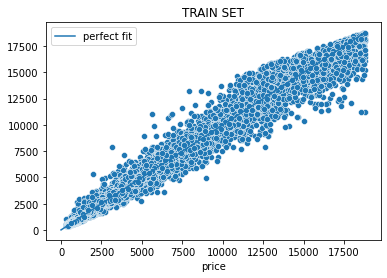

TEST SET
MAPE:  0.12969534100140165
R2:  0.9463547654665809


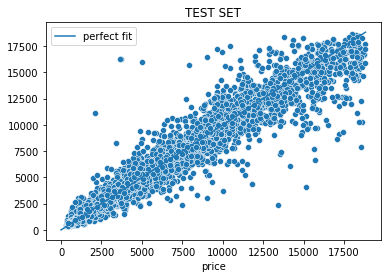

In [ ]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(y_train, train_preds, 'TRAIN SET')
test_metrics = evaluate(y_test, test_preds, 'TEST SET')


# PREVISIONE FINALE

In [ ]:
unlabeled_df = pd.read_pickle('diamonds_test.pkl')

## PRE-PROCESSING

In [ ]:
X = unlabeled_df.copy()

### dummies
dummies = pd.get_dummies(X[categorical_features], drop_first=True)
X = X.drop(categorical_features, axis=1)
X = X.join(dummies)

### standardization
X = scaler.transform(X)

In [ ]:
final_preds = model.predict(X)
final_preds = pd.Series(final_preds, index=unlabeled_df.index)

In [ ]:
final_preds.to_csv('giovanni.csv')